In [84]:
import pandas as pd
# Read a parquet file
# df = pd.read_parquet('ds/train_data.parquet')
df = pd.read_parquet("/home/ss/ve1/AmeX/AmEx/train_data.parquet")

from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['y','id1', 'id2', 'id3', 'id4', 'id5'])
y = df['y'] 

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

mi_dict = {}

for col in X.columns:
    X_col = X[[col]].dropna()
    y_col = y.loc[X_col.index]

    if len(X_col) == 0 or len(set(y_col)) <= 1:
        mi_dict[col] = 0
        continue

    # If column is not numeric, label encode it
    if X_col[col].dtype == 'object' or X_col[col].dtype.name == 'category':
        le = LabelEncoder()
        try:
            X_col[col] = le.fit_transform(X_col[col])
        except Exception:
            mi_dict[col] = 0
            continue

    try:
        score = mutual_info_classif(X_col, y_col, discrete_features='auto')[0]
        mi_dict[col] = score
        print(col, score)
    except Exception:
        mi_dict[col] = 0  # fallback if it fails for any other reason

In [102]:
df = pd.read_csv('MI.csv')
mi_dict = dict(zip(df['feature'], df['mi_score']))
zero_keys = [key for key, value in mi_dict.items() if value == 0]

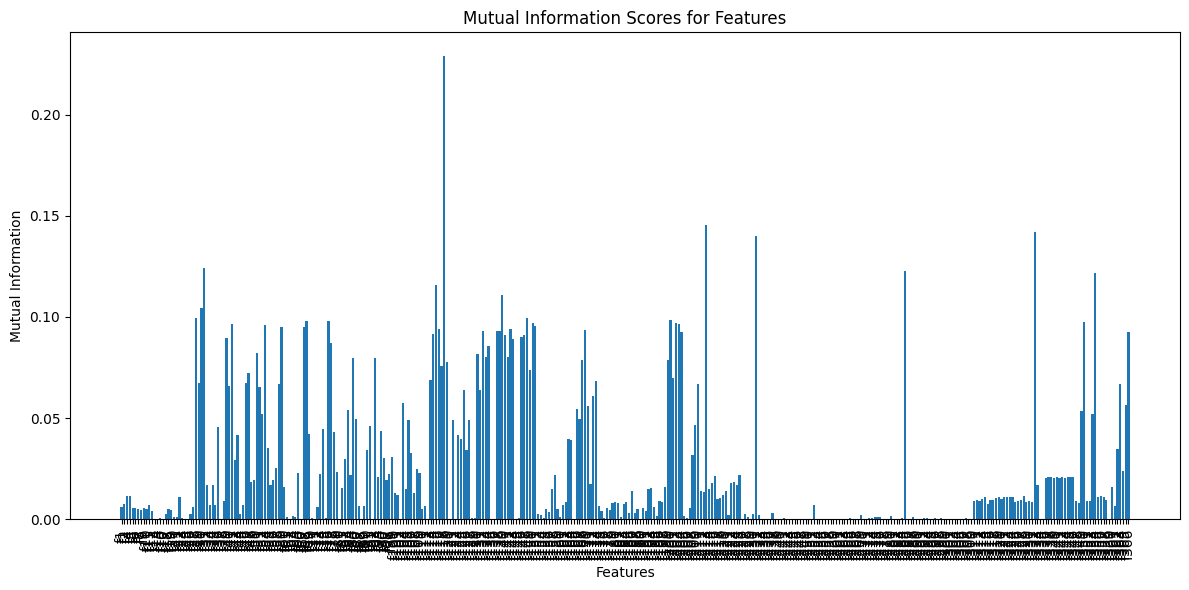

In [103]:
import matplotlib.pyplot as plt

keys = list(mi_dict.keys())
values = list(mi_dict.values())

# Plot
plt.figure(figsize=(12, 6))
plt.bar(keys, values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information Scores for Features')
plt.tight_layout()
plt.show()

In [104]:
selected_keys = [key for key, value in mi_dict.items() if value >= 0.1]

In [106]:
selected_values = [mi_dict[key] for key in selected_keys]
print(selected_values)

[0.1046009348519398, 0.1240686355187499, 0.1156533905681636, 0.2293076892213581, 0.1110339649592913, 0.1453078760750885, 0.1402616360490524, 0.1227629343608582, 0.1419828627723924, 0.1216368741194366]


In [107]:
selected_keys

['f30', 'f31', 'f115', 'f118', 'f139', 'f213', 'f231', 'f285', 'f332', 'f354']

In [112]:
len(X['f231'].dropna())

770146